1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

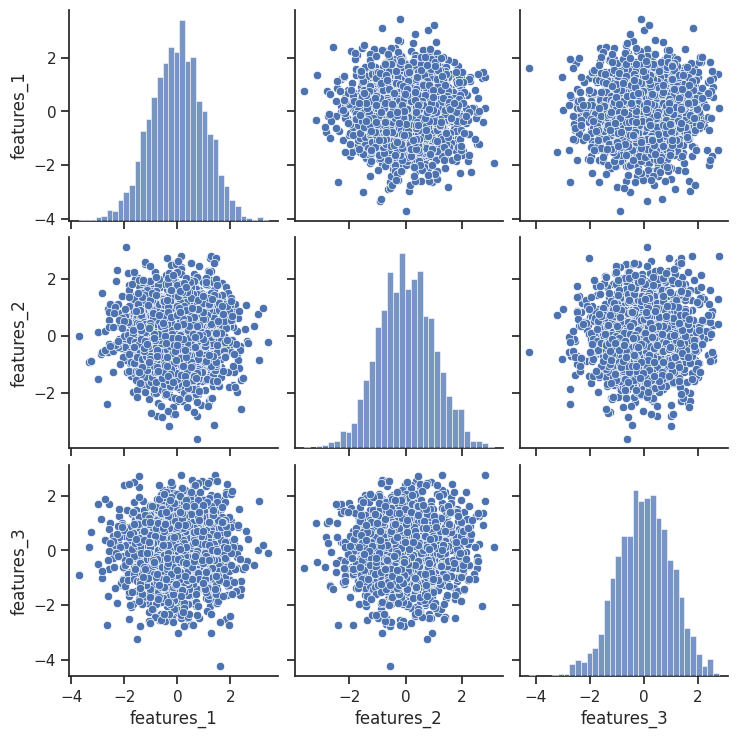

In [3]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/

import pandas as pd
import seaborn as sns

features = pd.read_csv('data/regression_generated.csv')
selected_features = ['features_1', 'features_2', 'features_3']

sns.pairplot(features[selected_features])

# Points in the scatter plots don't follow a trend, but they are scattered randomly, so there may not be any correlation.

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

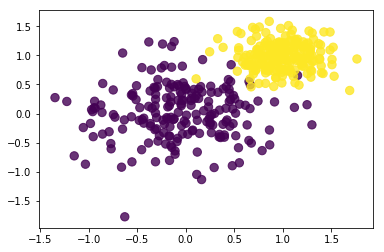

In [4]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

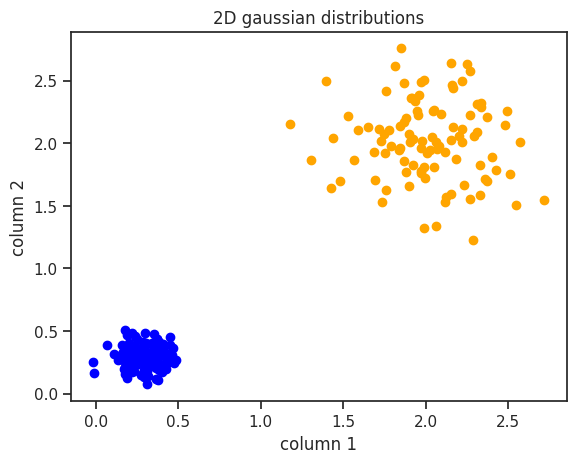

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_dataset(nb_sample, mean1, std1, mean2, std2):
    np.random.seed(19680801)
    category1 = np.random.normal(mean1, std1, size=(nb_sample, 2))
    category2 = np.random.normal(mean2, std2, size=(nb_sample, 2))
    return category1, category2

set1, set2 = generate_2d_dataset(100, 0.3, 0.1, 2, 0.3)
plt.scatter(set1[:, 0], set1[:, 1], color='blue', label='category 1')
plt.scatter(set2[:, 0], set2[:, 1], color='orange', label='category 2')
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.title('2D gaussian distributions')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Clean dataframe:
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


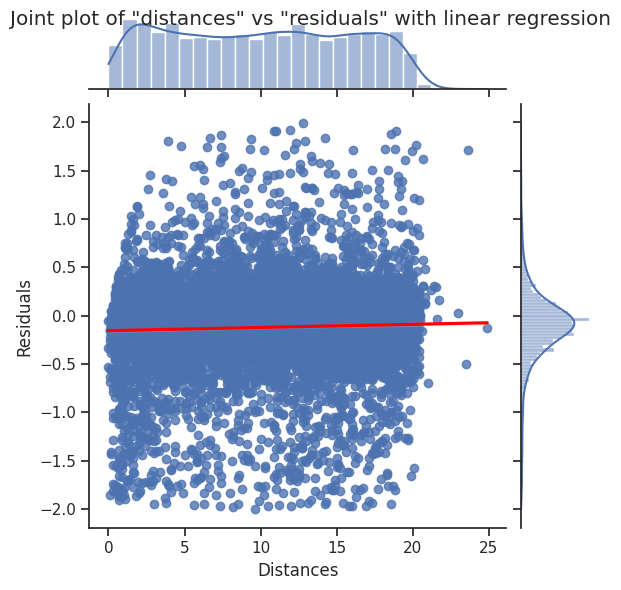

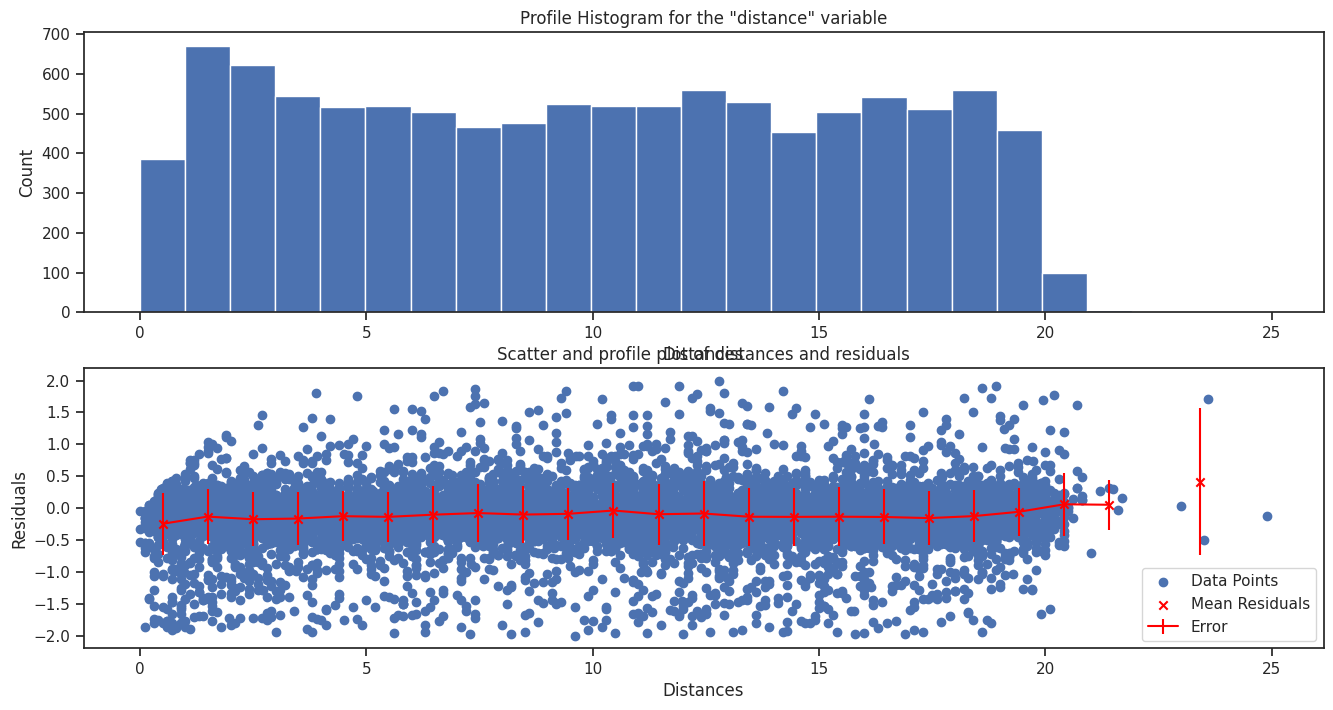

In [51]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import pandas as pd
import pickle

file_name = "data/residuals_261.pkl"
infile = open(file_name, 'rb')
new_dict = pickle.load(infile)
infile.close()

df = pd.DataFrame(new_dict.item())
clean_df = df[df['residuals'].abs() < 2]
print(f"Clean dataframe:\n{clean_df}")

sns.jointplot(x='distances', y='residuals', data=clean_df, kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.suptitle('Joint plot of "distances" vs "residuals" with linear regression')
plt.show()

# We observe that there is not a strong correlation.

fig, ax = plt.subplots(2, 1, figsize=(16, 8))
_, bin_edges, _ = ax[0].hist(clean_df['distances'], bins=25, range=(clean_df['distances'].min(), clean_df['distances'].max()))
ax[0].set_title('Profile Histogram for the "distance" variable')
ax[0].set_xlabel('Distances')
ax[0].set_ylabel('Count')

x = (bin_edges[1:] + bin_edges[:-1]) / 2
y = []
err_y = []
for i in range(len(bin_edges)-1):
    data = clean_df[(clean_df['distances']>=bin_edges[i]) & (clean_df['distances']<bin_edges[i+1])]
    y.append(data['residuals'].mean())
    err_y.append(data['residuals'].std())

ax[1].scatter(clean_df['distances'], clean_df['residuals'], label='Data Points')
ax[1].scatter(x, y, marker='x', color='red', label='Mean Residuals')
ax[1].errorbar(x, y, err_y, color='red', label='Error')
ax[1].set_xlabel('Distances')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Scatter and profile plot of distances and residuals')
ax[1].legend()
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


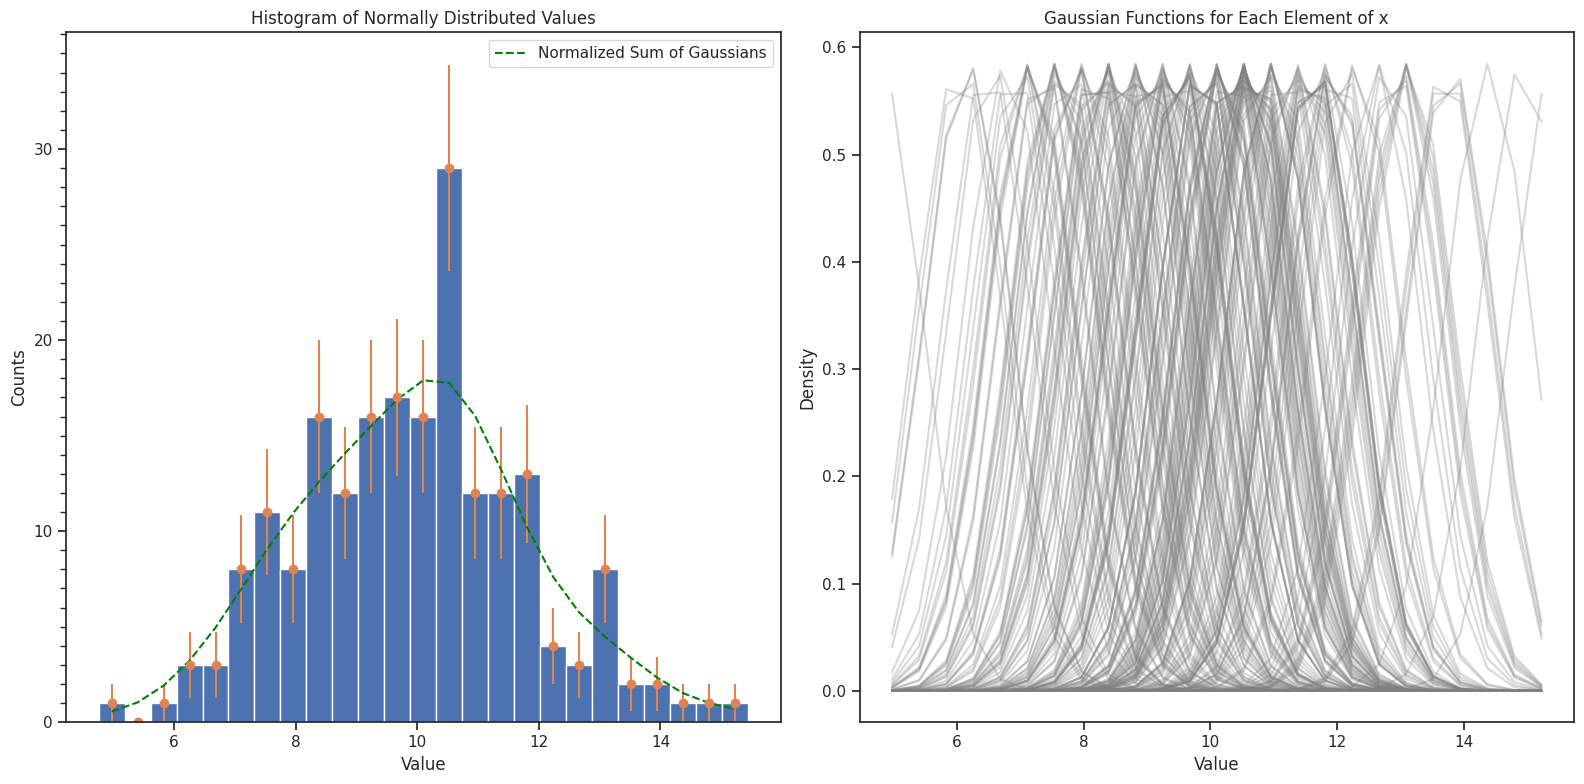

In [89]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import norm
from scipy.integrate import trapz

np.random.seed(42)
mean = 10
std = 2
N = 200
x = np.random.normal(mean, std, N)

nb_bins = 25
std_factor = 1.06

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_ylabel('count')
ax[0].yaxis.set_major_locator(MultipleLocator(10))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(10))

counts, bin_edges, _ = ax[0].hist(x, bins=nb_bins)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
ax[0].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='o')

ax[0].set_xlabel("Value")
ax[0].set_ylabel("Counts")
ax[0].set_title("Histogram of Normally Distributed Values")


std_default = 1.06 * x.std() * x.size ** (-1/5)
gaussians = []
for value in x:
    gaussians.append(norm.pdf(bin_centers, loc=value, scale=std_default))
    ax[1].plot(bin_centers, gaussians[-1], color='gray', alpha=0.3)
ax[1].set_xlabel("Value")
ax[1].set_ylabel("Density")
ax[1].set_title("Gaussian Functions for Each Element of x")

sum_gaussians = np.sum(gaussians, axis=0)
normalized_sum = sum_gaussians * trapz(counts, bin_centers) / trapz(sum_gaussians, bin_centers)
ax[0].plot(bin_centers, normalized_sum, color='green', linestyle='--', label='Normalized Sum of Gaussians')
ax[0].legend()

plt.tight_layout()
plt.show()